In [8]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.8 MB 4.2 MB/s eta 0:00:02
   -------- ------------------------------- 1.6/7.8 MB 4.9 MB/s eta 0:00:02
   ------------ --------------------------- 2.4/7.8 MB 3.7 MB/s eta 0:00:02
   ---------------- ----------------------- 3.1/7.8 MB 3.9 MB/s eta 0:00:02
   --------------------- ------------------ 4.2/7.8 MB 4.0 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/7.8 MB 4.2 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/7.8 MB 4.1 MB/s eta 0:00:01
   -------------------------------- ------- 6.3/7.8 MB 4.0 MB/s eta 0:00:01
   ------------------------------------ --- 7.1/7.8 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 3.7 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB

In [ ]:
!pip install scipy

   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
    --------------------------------------- 0.8/46.2 MB 4.2 MB/s eta 0:00:11
   - -------------------------------------- 2.1/46.2 MB 4.9 MB/s eta 0:00:10
   -- ------------------------------------- 3.1/46.2 MB 5.1 MB/s eta 0:00:09
   --- ------------------------------------ 4.2/46.2 MB 5.1 MB/s eta 0:00:09
   ---- ----------------------------------- 5.5/46.2 MB 5.2 MB/s eta 0:00:08
   ----- ---------------------------------- 6.8/46.2 MB 5.2 MB/s eta 0:00:08
   ------ --------------------------------- 7.3/46.2 MB 5.2 MB/s eta 0:00:08
   ------- -------------------------------- 8.4/46.2 MB 4.9 MB/s eta 0:00:08
   ------- -------------------------------- 9.2/46.2 MB 4.8 MB/s eta 0:00:08
   --------- ------------------------------ 10.5/46.2 MB 4.8 MB/s eta 0:00:08
   --------- ------------------------------ 11.5/46.2 MB 4.9 MB/s eta 0:00:08
   ---------- ----------------------------- 12.6/46.2 MB 4.9 MB/s eta 0:00:07
   

Try to find a way to differentiate transformed bat sounds from original bat sounds (above hearing frequency)
Sampling rate is often higher for original sounds. However, for these 2 examples it is the same..


In [ ]:
import scipy.io.wavfile as wav

# download some sounds and change this to your path to turn them into spectograms

# sound one sounded transformed to me, sound 2 didn't sound transformed (humans were speaking in the background)
sound_one = "C:/Users/Gebruiker/Downloads/XC935114 - Gewone dwergvleermuis - Pipistrellus pipistrellus.wav"
sound_two = "C:/Users/Gebruiker/Downloads/XC938943 - Gewone dwergvleermuis - Pipistrellus pipistrellus.wav"

sr, _ = wav.read(sound_one)
print(f'transformed sound, sr is {sr}, _ is {_}')

sr, _ = wav.read(originalex)
print(f'original sound, sr is {sr}, _ is {_}')


transformed sound, sr is 256000, _ is [-57 -92 -35 ...  10  12  91]
original sound, sr is 256000, _ is [ -3   6  18 ... 146 -18  96]


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_13276\4236352967.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, _ = wav.read(transformedex)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram

In [ ]:
def spectogram(data, title:str):
    # If stereo, convert to mono
    if data.ndim > 1:
        data = np.mean(data, axis=1)

    # Generate spectrogram
    f, t, Sxx = spectrogram(data, sr)

    # Plot the spectrogram
    plt.pcolormesh(t, f, np.log(Sxx), shading="gouraud")
    plt.ylabel("Frequency [Hz]")
    plt.xlabel("Time [sec]")
    plt.title(f"Spectrogram of {title}")
    plt.ylim(0, 100000)  # Zoom into the frequency range of interest (up to 100 kHz)
    plt.colorbar(label="Log Intensity")
    plt.show()

In [ ]:
sound_three = "C:/Users/Gebruiker/Downloads/XC931826 - Gewone dwergvleermuis - Pipistrellus pipistrellus.wav"
sound_four = "C:/Users/Gebruiker/Downloads/XC934344 - Gewone dwergvleermuis - Pipistrellus pipistrellus.wav"

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_13276\3755215660.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, data = wavfile.read(transformedex)


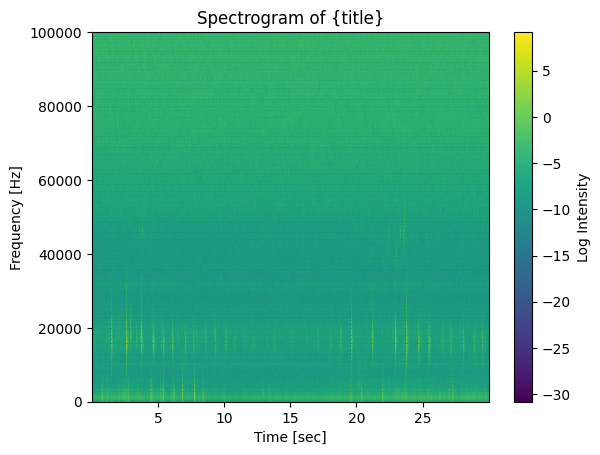

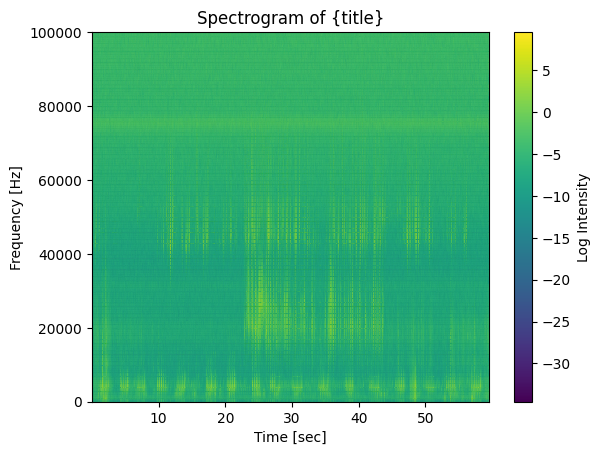

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_13276\3755215660.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, data = wavfile.read(echolocationex)


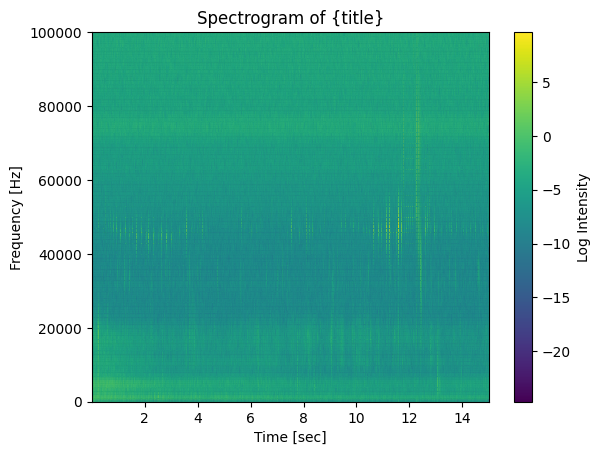

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_13276\3755215660.py:11: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, data = wavfile.read(maybeoriginalex)


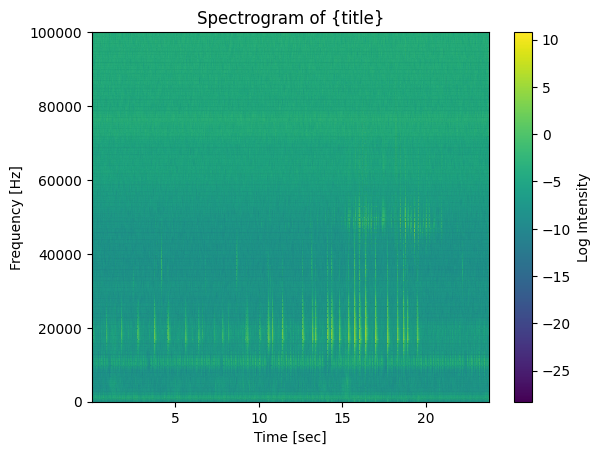

In [ ]:

sr, data = wavfile.read(sound_one)
spectogram(data, "transformed bat sound")

sr, data = wavfile.read(sound_two)
spectogram(data, "original bat sound")

sr, data = wavfile.read(sound_three)
spectogram(data, "echo bat sound")

sr, data = wavfile.read(sound_four)
spectogram(data, "idk bat sound")

In [ ]:
# The script that is needed to get the data is:
"""
pip install xeno-canto
xeno-canto -dl grp:"bats" q:"A"
"""
# grp: bats = stands for the group of animals we are filtering on
# q: A = stands for the quality of the recording. The rank starts from A (clear and loud) to E (unclear)
# Therefore, if we want also other qualities, we just select the same group but a different quality